<a href="https://colab.research.google.com/github/Manish1176/Deep-Learning-Project/blob/main/DL_Project_3_Dog_vs_Cat_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dog vs cat dataset from kaggle

In [5]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:11<00:00, 101MB/s] 
100% 812M/812M [00:11<00:00, 74.8MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


printing names of images

In [10]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.117.jpg', 'cat.8265.jpg', 'cat.6518.jpg', 'dog.4021.jpg', 'dog.10505.jpg', 'dog.1009.jpg', 'dog.11539.jpg', 'dog.565.jpg', 'cat.6460.jpg', 'cat.8930.jpg', 'dog.6400.jpg', 'dog.1443.jpg', 'dog.3704.jpg', 'dog.2539.jpg', 'dog.10428.jpg', 'dog.8193.jpg', 'dog.12220.jpg', 'dog.8639.jpg', 'dog.5716.jpg', 'dog.3042.jpg', 'cat.1974.jpg', 'cat.8894.jpg', 'dog.9748.jpg', 'cat.10494.jpg', 'cat.3421.jpg', 'cat.3629.jpg', 'dog.6540.jpg', 'cat.1279.jpg', 'cat.409.jpg', 'cat.8641.jpg', 'dog.9340.jpg', 'dog.6153.jpg', 'dog.156.jpg', 'dog.8928.jpg', 'cat.189.jpg', 'dog.6907.jpg', 'dog.3880.jpg', 'cat.2096.jpg', 'cat.4053.jpg', 'cat.12018.jpg', 'cat.10287.jpg', 'cat.6567.jpg', 'dog.845.jpg', 'dog.2060.jpg', 'dog.10023.jpg', 'dog.8405.jpg', 'dog.2688.jpg', 'dog.4542.jpg', 'cat.2899.jpg', 'dog.4551.jpg', 'cat.1040.jpg', 'cat.2042.jpg', 'cat.11311.jpg', 'cat.10528.jpg', 'cat.4940.jpg', 'dog.6817.jpg', 'cat.2828.jpg', 'dog.2358.jpg', 'cat.12125.jpg', 'dog.4574.jpg', 'cat.9491.jpg', 'dog.8964.jpg', 'c

Importing dependencies

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of cats & dogs

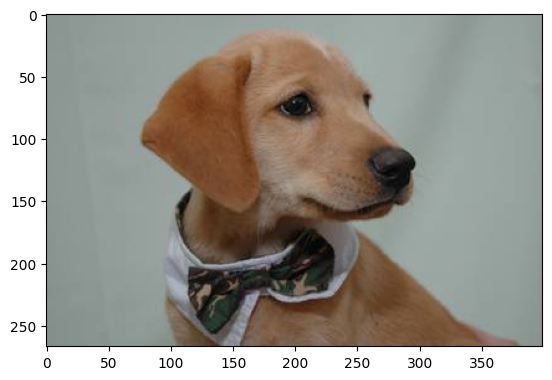

In [17]:
# display dog image
img = mpimg.imread('/content/train/dog.11539.jpg')
imgplt = plt.imshow(img)
plt.show()

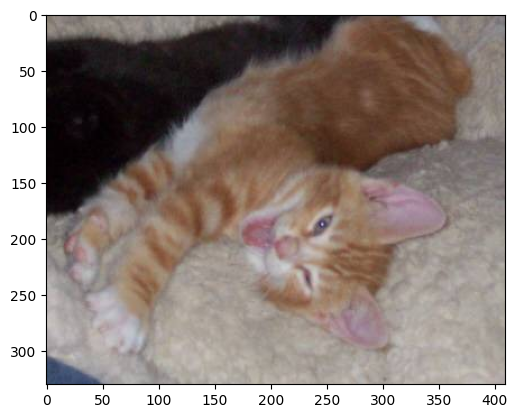

In [18]:
# display cat image
img = mpimg.imread('/content/train/cat.8265.jpg')
imgplt = plt.imshow(img)
plt.show()

In [19]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

dog
cat
cat
dog
dog


In [22]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for i in file_names:

  name = i[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing the images

In [23]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [24]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

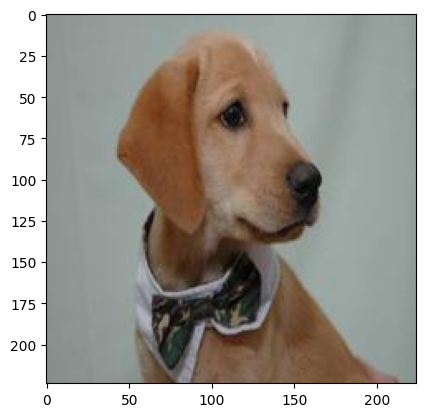

In [26]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11539.jpg')
imgplt = plt.imshow(img)
plt.show()

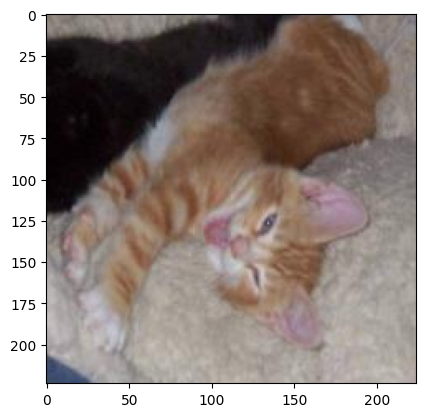

In [27]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.8265.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resizing images of cat and dog

cat--> 0

dog--> 1

In [28]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [29]:
print(filenames[0:5])
print(len(filenames))

['dog.117.jpg', 'cat.8265.jpg', 'cat.6518.jpg', 'dog.4021.jpg', 'dog.10505.jpg']
2000


In [30]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 1]
2000


In [31]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1005  995]


Converting resized images into array

In [32]:
import cv2
import glob

In [33]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [34]:
print(dog_cat_images)

[[[[ 13  22  25]
   [ 12  21  24]
   [ 10  19  22]
   ...
   [157 186 213]
   [157 186 213]
   [157 186 213]]

  [[ 19  28  32]
   [ 15  27  29]
   [ 16  25  29]
   ...
   [157 186 213]
   [157 186 213]
   [157 186 213]]

  [[ 24  34  41]
   [ 21  33  37]
   [ 21  31  38]
   ...
   [157 186 213]
   [157 186 213]
   [157 186 213]]

  ...

  [[  8  19  23]
   [  7  18  22]
   [  7  18  22]
   ...
   [ 21  31  41]
   [ 20  30  40]
   [ 20  30  40]]

  [[  8  19  23]
   [  7  18  22]
   [  7  18  22]
   ...
   [ 21  31  41]
   [ 20  30  40]
   [ 20  30  40]]

  [[  8  19  23]
   [  7  18  22]
   [  7  18  22]
   ...
   [ 21  31  41]
   [ 20  30  40]
   [ 20  30  40]]]


 [[[123 134 142]
   [117 128 136]
   [117 128 136]
   ...
   [129 119 125]
   [129 117 123]
   [134 122 128]]

  [[118 129 137]
   [113 124 132]
   [114 125 133]
   ...
   [133 123 129]
   [133 121 127]
   [135 123 129]]

  [[113 124 132]
   [109 120 128]
   [112 121 130]
   ...
   [135 128 133]
   [137 127 133]
   [134 124

In [35]:
type(dog_cat_images)

numpy.ndarray

In [36]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [37]:
X = dog_cat_images
Y = np.asarray(labels)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


training data=1600

teting data=400

In [40]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [41]:
print(X_train_scaled)

[[[[0.54117647 0.67058824 0.77254902]
   [0.51764706 0.65490196 0.75686275]
   [0.51372549 0.64705882 0.76078431]
   ...
   [0.67843137 0.76470588 0.83529412]
   [0.6745098  0.76078431 0.83137255]
   [0.67058824 0.75686275 0.82745098]]

  [[0.54901961 0.66666667 0.77254902]
   [0.52941176 0.65882353 0.76078431]
   [0.51764706 0.65098039 0.76470588]
   ...
   [0.68235294 0.76862745 0.83921569]
   [0.67843137 0.76470588 0.83529412]
   [0.6745098  0.76078431 0.83137255]]

  [[0.55294118 0.66666667 0.77254902]
   [0.54509804 0.6627451  0.76862745]
   [0.5254902  0.65882353 0.77254902]
   ...
   [0.68627451 0.77254902 0.84313725]
   [0.68235294 0.76862745 0.83921569]
   [0.67843137 0.76470588 0.83529412]]

  ...

  [[0.4745098  0.41960784 0.42745098]
   [0.47058824 0.40784314 0.41176471]
   [0.4745098  0.39607843 0.39215686]
   ...
   [0.62352941 0.66666667 0.78431373]
   [0.61960784 0.6627451  0.78039216]
   [0.61960784 0.6627451  0.78039216]]

  [[0.47058824 0.40784314 0.41176471]
   [0.4

**Building neural network**

In [42]:
import tensorflow as tf
import tensorflow_hub as hub

In [43]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [44]:
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [46]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [49]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [50]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.2639 - acc: 0.8875
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0797 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 59s 1s/step - loss: 0.0597 - acc: 0.9781
Epoch 4/5
50/50 [==============================] - 55s 1s/step - loss: 0.0497 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 58s 1s/step - loss: 0.0422 - acc: 0.9894


In [51]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 941ms/step - loss: 0.0988 - acc: 0.9550
Test Loss = 0.09878581017255783
Test Accuracy = 0.9549999833106995


**Predictive System**

Path of the image to be predicted: /content/dog-8198719_640.webp


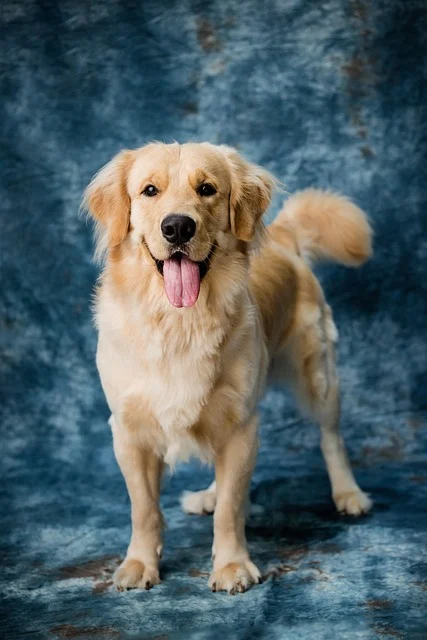

1/1 [==============================] - 0s 76ms/step
[[-2.6745994  3.2583404]]
1
The image represents a Dog


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


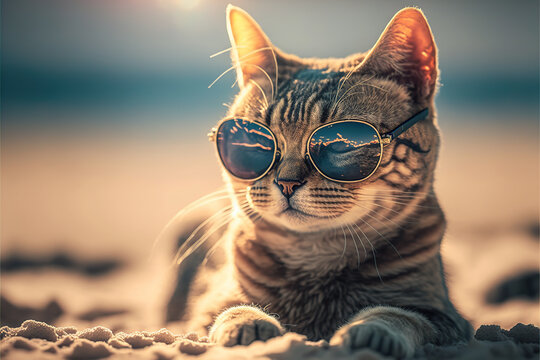

1/1 [==============================] - 0s 66ms/step
[[ 0.6194861 -3.0812457]]
0
The image represents a Cat


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')